In [50]:
import math

class hive():

  def __init__(self,t,H,F_p,F_n,f_p,f_n,B_o,B_c,L,v,b,K,m_c,m_p,m_n,a_min_p,a_max_p,a_min_n,a_max_n,delta,phi_o,phi_c,lambda_b_o,gamma_b_o,gamma_H,lambda_A,c,name):
    self.name = name
    self.t = t
    self.H = H
    self.F_p = F_p
    self.F_n = F_n
    self.f_p = f_p
    self.f_n = f_n
    self.B_o = B_o
    self.B_c = B_c
    self.L = L
    self.v = v
    self.b = b
    self.K = K
    self.m_c = m_c
    self.m_p = m_p
    self.m_n = m_n
    self.a_min_p = a_min_p
    self.a_max_p = a_max_p
    self.a_min_n = a_min_n
    self.a_max_n = a_max_n
    self.delta = delta
    self.phi_o = phi_o
    self.phi_c = phi_c
    self.lambda_b_o = lambda_b_o
    self.gamma_b_o = gamma_b_o
    self.gamma_H = gamma_H
    self.lambda_A = lambda_A
    self.c = c

  def dBo(self):
    one = (self.L*self.S())
    two = (self.phi_o*self.B_o)
    return (one - two)

  def dBc(self):
    one = (self.phi_o*self.B_o)
    two = (self.phi_c*self.B_c)
    three = (self.m_c*self.B_c)
    return (one-two-three)

  def dH(self):
    one = (self.phi_c*self.B_c)
    two = (self.H*self.Rp())
    three = (self.H*self.Rn())
    return (one-two-three)

  def dFp(self):
    one = (self.H*self.Rp())
    two = (self.m_p*self.F_p)
    return (one-two)

  def dFn(self):
    one = (self.H*self.Rn())
    two = (self.m_n*self.F_n)
    return (one-two)

  def dfp(self):
    one = (self.mup()*self.c*self.F_p)
    two = (self.gamma_b_o*self.B_o)
    three = (self.gamma_H*self.H)
    return (one-two-three)

  def dfn(self):
    one = (self.mun()*self.c*self.F_n)
    two = (self.lambda_b_o*self.B_o)
    three = (self.lambda_A*(self.H + self.F_p + self.F_n))
    return (one-two-three)

  def S(self):
    f_p_2 = (self.f_p)**2
    one = (self.H/(self.H + self.v))
    two = (self.f_n/(self.f_n + self.b))
    three = (f_p_2/(f_p_2+(self.K*self.H)))
    return (one*two*three)

  def Rp(self):
    f_p_2 = (self.f_p)**2
    one = self.a_max_p*(1-(f_p_2/(f_p_2+(self.K*self.H))))
    two = self.delta*(self.F_p/(self.F_p + self.F_n + self.H))
    return (self.a_min_p + one - two)

  def Rn(self):
    one = self.a_max_n*(1-(self.f_n/(self.f_n+self.b)))
    two = self.delta*(self.F_n/(self.F_p + self.F_n + self.H))
    return (self.a_min_n + one - two)

  def mup(self):
    return (0.5*(math.sin(((math.pi*self.t)/180)+(math.pi/2))+2.5))

  def mun(self):
    return (0.5*(math.sin((math.pi*self.t)/180)+5.5))

  def forward(self):
    B_o = self.B_o + self.dBo()
    B_c = self.B_c + self.dBc()
    H = self.H + self.dH()
    F_p = self.F_p + self.dFp()
    F_n = self.F_n + self.dFn()
    f_p = self.f_p + self.dfp()
    f_n = self.f_n + self.dfn()
    time = self.t + 1
    return({'t':time,'H':H,'F_p':F_p,'F_n':F_n,'f_p':f_p,'f_n':f_n,'B_o':B_o,'B_c':B_c})

In [94]:
params = {'t':0,
          'H':16000,
          'F_p':2000,
          'F_n':6000,
          'f_p':0,
          'f_n':0,
          'B_o':0,
          'B_c':0,
          'L':2000,
          'v':5000,
          'b':500,
          'K':8,
          'm_c':0,
          'm_p':0.5,
          'm_n':0.5,
          'a_min_p':0.25,
          'a_max_p':0.25,
          'a_min_n':0.25,
          'a_max_n':0.25,
          'delta':0.75,
          'phi_o':1/9,
          'phi_c':1/12,
          'lambda_b_o':0.018,
          'gamma_b_o':0.018,
          'gamma_H':0.007,
          'lambda_A':0.007,
          'c':0.1,
          'name':'hive1'}
days = 1

In [95]:
def simulate(params,days):
  hives = hive(**params)
  for i in range(days):
    updated = hives.forward()
    params.update(updated)
    hives = hive(**params)
  return updated

In [100]:
simulate(params,days)

{'t': 5,
 'H': 2631.1257211030943,
 'F_p': 913.3488401139958,
 'F_n': 990.6003529455927,
 'f_p': 2778.487447397248,
 'f_n': 5393.657023337895,
 'B_o': 2280.152424464684,
 'B_c': 350.0565179649734}

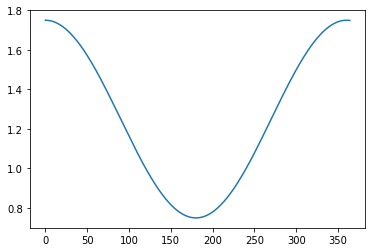

In [104]:
import numpy
from matplotlib.pyplot import plot
plot(0.5*(numpy.sin(((math.pi*numpy.arange(365))/180)+(math.pi/2))+2.5))